# Normalized Sense Function

In this notebook, let's go over the steps a robot takes to help localize itself from an initial, uniform distribution to sensing and updating that distribution and finally normalizing that distribution.

1. The robot starts off knowing nothing; the robot is equally likely to be anywhere and so `p` is a uniform distribution.
2. Then the robot senses a grid color: red or green, and updates this distribution `p` according to the values of pHit and pMiss.
3. **We normalize `p` such that its components sum to 1.**

<img src='images/robot_sensing.png' width=50% height=50% />


In [47]:
# importing resources
from typing import List
import matplotlib.pyplot as plt
import numpy as np

A helper function for visualizing a distribution.

In [48]:
def display_map(grid: List[float], bar_width: int = 1) -> None:
    """Creates a bar chart to show the probabilities for a robot to 
    be in each of the 1D grid cell.
    """
    if(len(grid) > 0):
        x_labels: range = range(len(grid))
        plt.bar(x_labels, height=grid, width=bar_width, color='b')
        plt.xlabel('Grid Cell')
        plt.ylabel('Probability')
        plt.ylim(0, 1) # range of 0-1 for probability values 
        plt.title('Probability of the robot being at each cell in the grid')
        plt.xticks(np.arange(min(x_labels), max(x_labels)+1, 1))
        plt.show()
    else:
        print('Grid is empty')

### QUIZ: Modify your code so that it normalizes the output for the sense function. 

This means that the entries in `q` should sum to one.

Note that `pHit` refers to the probability that the robot correctly senses the color of the square it is on, so if a robot senses red *and* is on a red square, we'll multiply the current location probability (0.2) with pHit. Same goes for if a robot senses green *and* is on a green square.

In [49]:
# given initial variables
p: List[float] = [0.2, 0.2, 0.2, 0.2, 0.2]
# the color of each grid cell in the 1D world
world: List[str] = ['green', 'red', 'red', 'green', 'green']
# Z, the sensor reading ('red' or 'green')
pHit: float = 0.6
pMiss: float = 0.2

In [50]:
# This time we are having another version of the sense function than the prior notebook.
# This version of the solution is a bit more numeric, which should come handy when we move 
# to 2D and 3D worlds.
def sense(p: List[float], Z: str) -> List[float]:
    """Takes in a current probability distribution, p, and a sensor reading, Z.
    Returns an nonnormalized distribution after the sensor measurement has been made, q.
    This should be accurate whether Z is 'red' or 'green'.
    
    Args:
        p: Prior probability distribution to sensor measurements
        Z: Cell color
    
    Returns:
        Normalized posterior probability distribution
    """
    q: List[float] = []
    # Iterate through all grid cells
    for prob, cell_color in zip(p, world):
        # check if the sensor reading is equal to the color of the grid cell
        # if so, hit = 1
        # if not, hit = 0
        hit: int = (Z == cell_color)
        # if hit - 1, we multiply the probability with pHit, because (1 - hit) = 0
        # If hit = 0, we multiply the probability with pMis, because (1 - hit) = 1
        q.append(prob * (hit * pHit + (1-hit) * pMiss))

    # Normalize q
    q = (np.array(q) / np.sum(q)).tolist()
    return q

[0.1111111111111111, 0.3333333333333332, 0.3333333333333332, 0.1111111111111111, 0.1111111111111111]


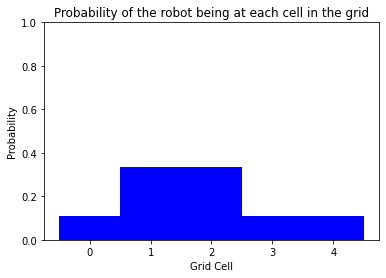

In [51]:
Z: str = 'red'
q: List[float] = sense(p,Z)
np.testing.assert_almost_equal(sum(q), 1.0)
print(q)

display_map(q)

[0.2727272727272727, 0.09090909090909093, 0.09090909090909093, 0.2727272727272727, 0.2727272727272727]


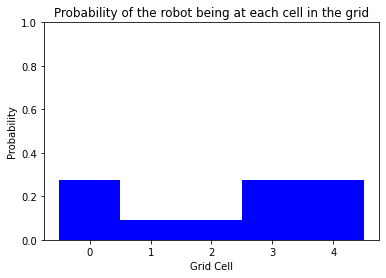

In [52]:
Z = 'green'
q: List[float] = sense(p,Z)
print(q)
display_map(q)